## Домашняя работа по базовой математической статистике для Data scientist

Задания со зведочкой не обязательны для зачета.

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats
%matplotlib inline


df = pd.read_csv("bikeshare.csv")
del df['datetime']
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


### 1.
Постройте гистограмму распределения каждой из метрик в датасете при помощи метода датафрейма `hist()`. При необходимости добавьте логарифмированную ось (параметр log).

array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>],
       [<AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>, <AxesSubplot:>]],
      dtype=object)

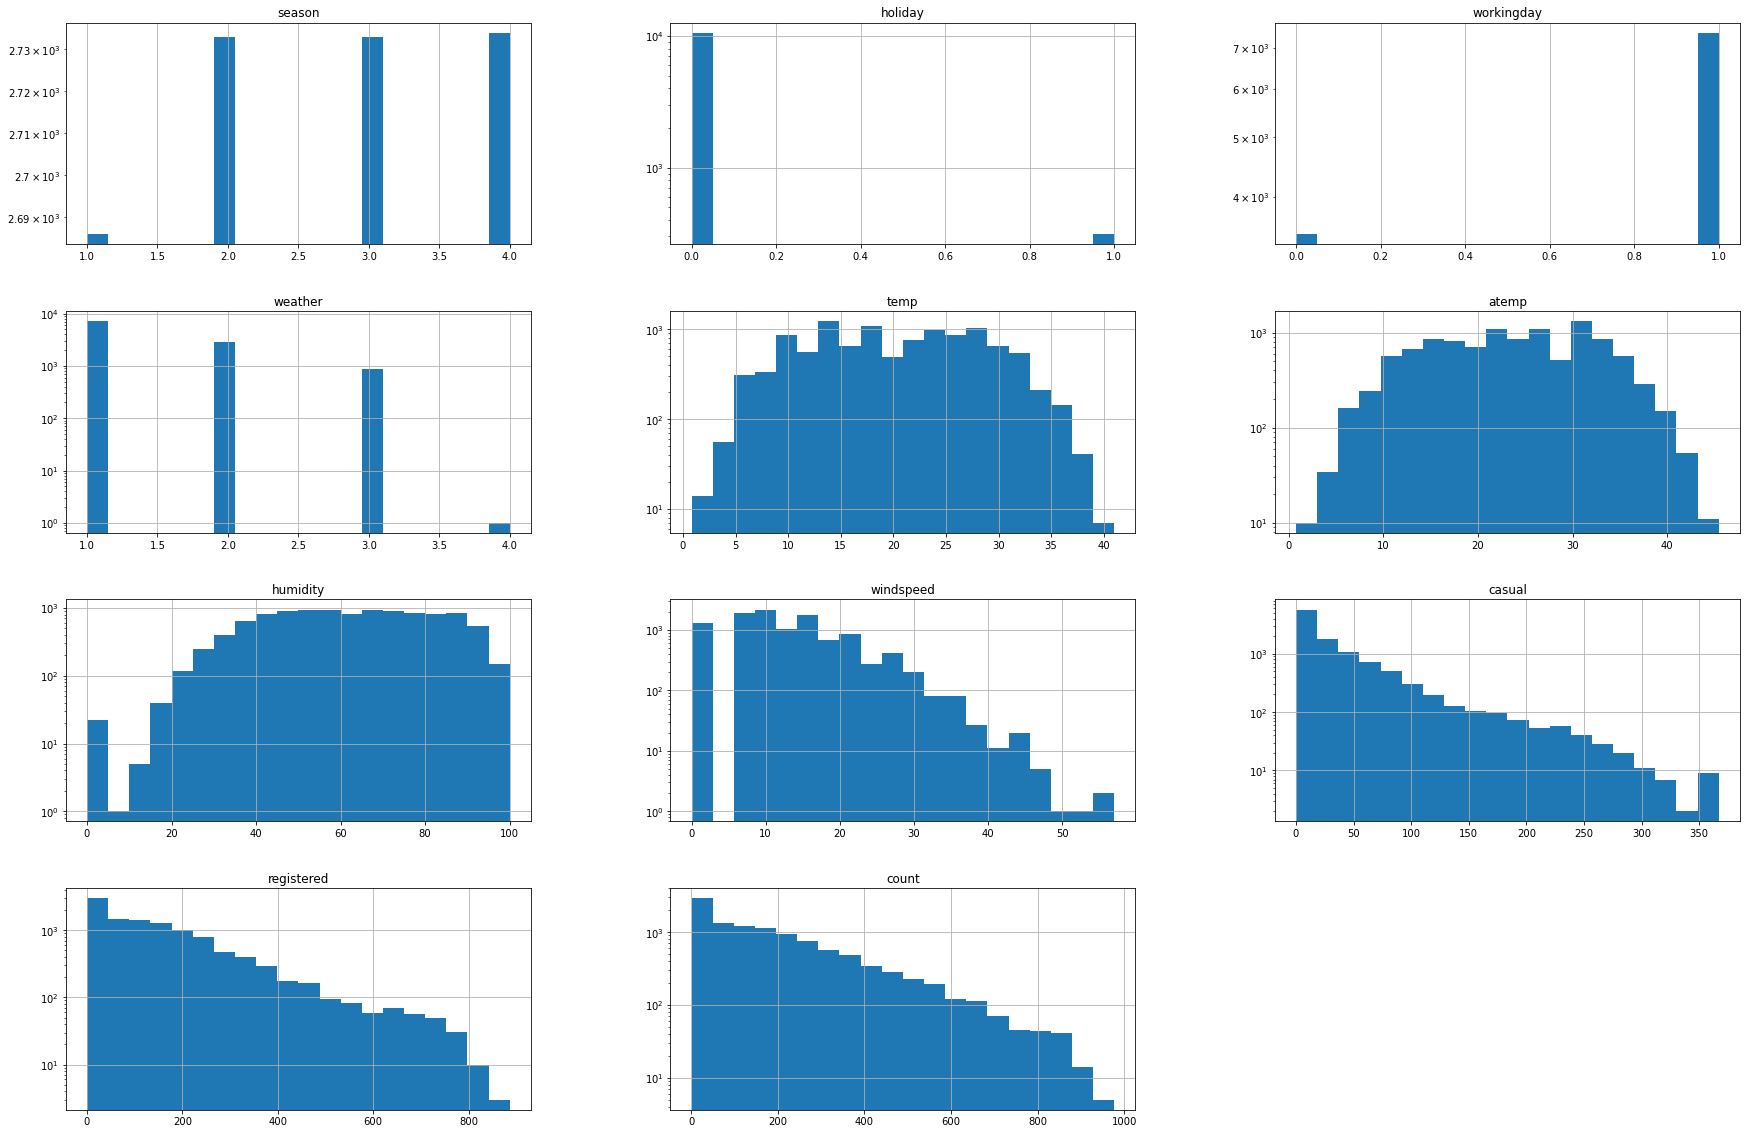

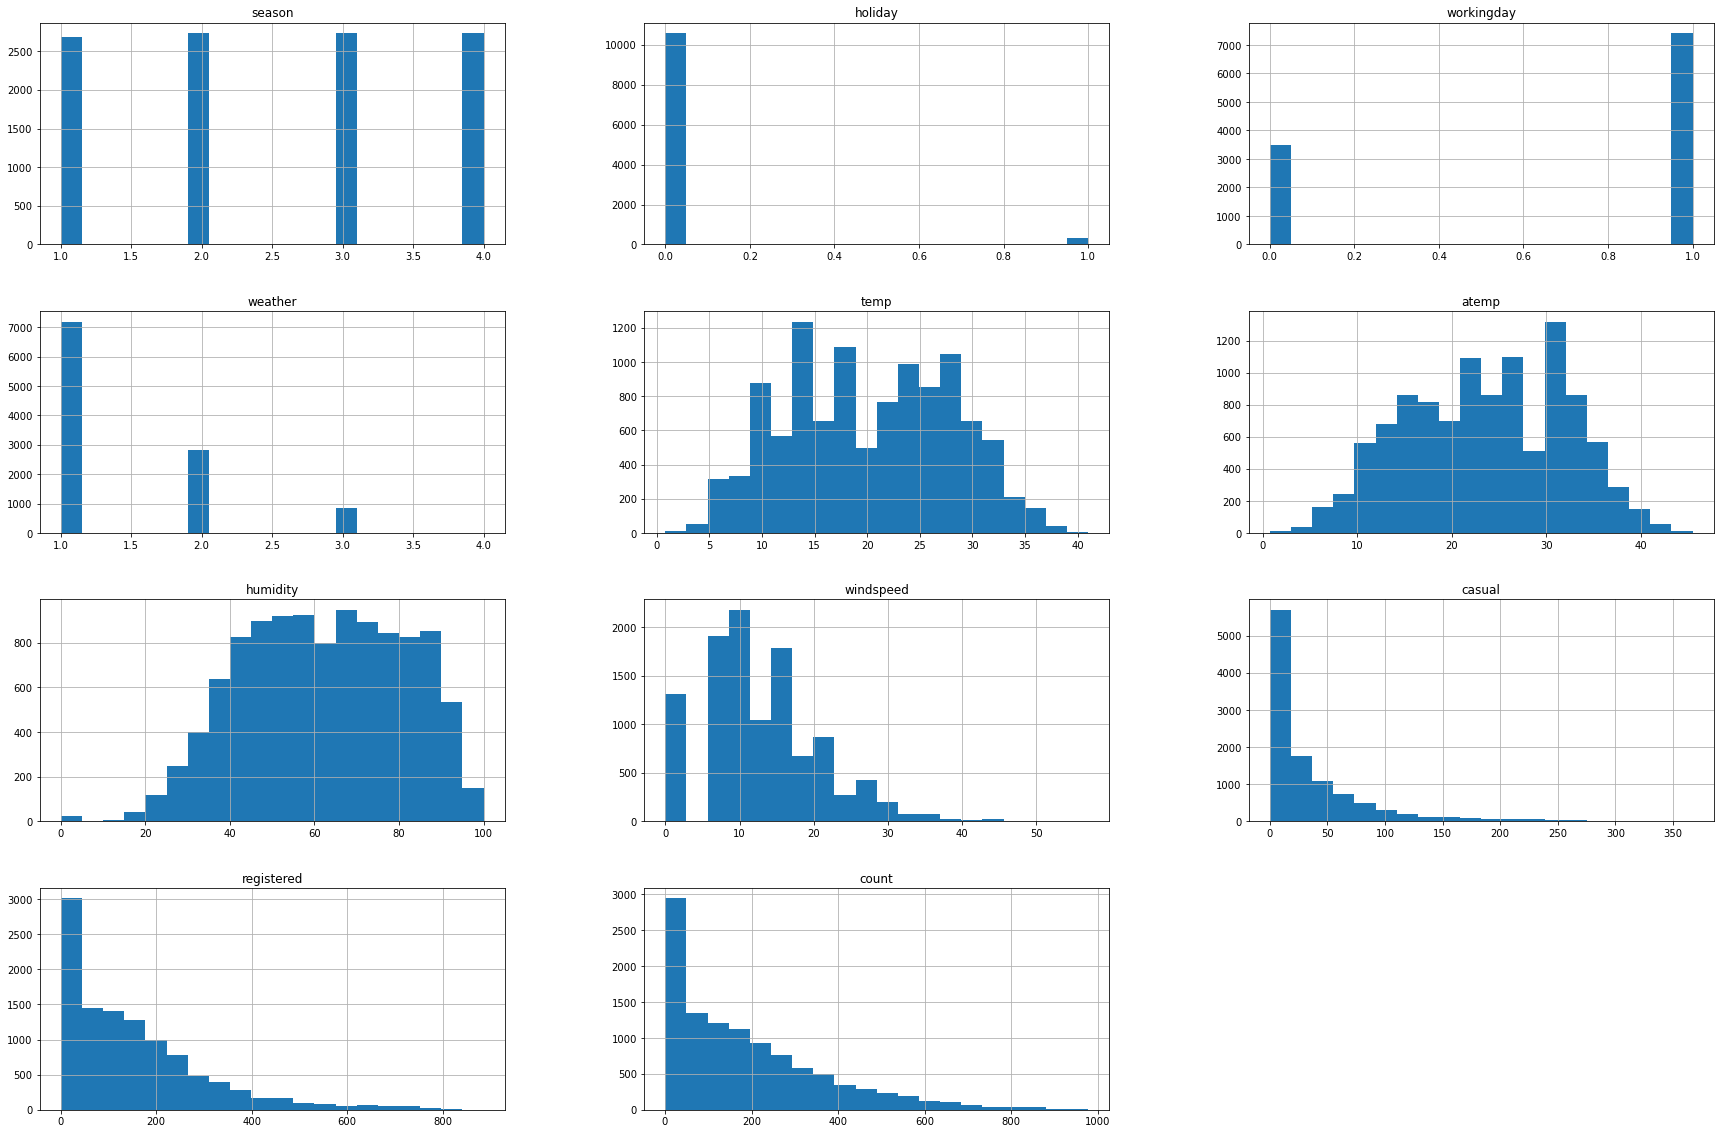

In [33]:
plt.rcParams["figure.figsize"] = (30.0, 20.0)
df.hist( bins=20, log = True)
df.hist( bins=20, log = False)


### 2.
Для каждой метрики найдите среднее, дисперсию, 50, 75 и 99 перцентили, моду. Какие выводы о наличии аномалий мы можем сделать?

In [118]:
df1 = pd.DataFrame(columns = ['Average', 'Variance', 'Percentile 50', 'Percentile 75', 'Percentile 99', 'Mode'],
                  index = ['season', 'holiday',  'workingday',  'weather',  
                              'temp',  'atemp',  'humidity',  'windspeed',  'casual',  
                              'registered',  'count'])

df1['Average'] = np.mean(df)
df1['Variance'] = np.var(df)
df1['Percentile 50'] = df.quantile(0.5)
df1['Percentile 75'] = df.quantile(0.75)
df1['Percentile 99'] = df.quantile(0.99)
df1['Mode'] = df.mode().T
df1 = df1.T
df1
# При низкой дисперсии аномалий будет мало, это кое-где подтверждается равентсвом персентилей.

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
Average,2.506614,0.028569,0.680875,1.418427,20.230860,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
Variance,1.245731,0.027753,0.217284,0.401714,60.703296,71.812258,370.337283,66.653546,2495.819930,22810.693906,32810.298886
Percentile 50,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
Percentile 75,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
Percentile 99,4.000000,1.000000,1.000000,3.000000,36.080000,40.150000,100.000000,35.000800,240.150000,697.000000,774.150000
Mode,4.000000,0.000000,1.000000,1.000000,14.760000,31.060000,88.000000,0.000000,0.000000,3.000000,5.000000


### 3. (*) 
 Для каждой метрики проанализируйте ассиметрию и смещенность распределения – для этого посчитайте для каждой метрики коэффициент ассиметрии и эксцесса.

In [129]:
df2 = pd.DataFrame(columns = ['Kurtosis', 'Skew'],
                  index = ['season', 'holiday',  'workingday',  'weather',  
                              'temp',  'atemp',  'humidity',  'windspeed',  'casual',  
                              'registered',  'count'])
df2['Kurtosis'] = stats.kurtosis(df)
df2['Skew'] = stats.skew(df)
df2


,Kurtosis,Skew
season,-1.355590,-0.007075
holiday,30.032624,5.659737
workingday,-1.397737,-0.776056
weather,0.394800,1.243313
temp,-0.914661,0.003690
atemp,-0.850236,-0.102545
humidity,-0.760020,-0.086323
windspeed,0.629292,0.588685
casual,7.547610,2.495404
registered,2.624324,1.524594


### 4.

Постройте симметричный доверительный интервал для метрики с самой большой дисперсией при доверительной вероятности 0.95. 

Text(0.5, 1.0, 'Доверительный интервал')

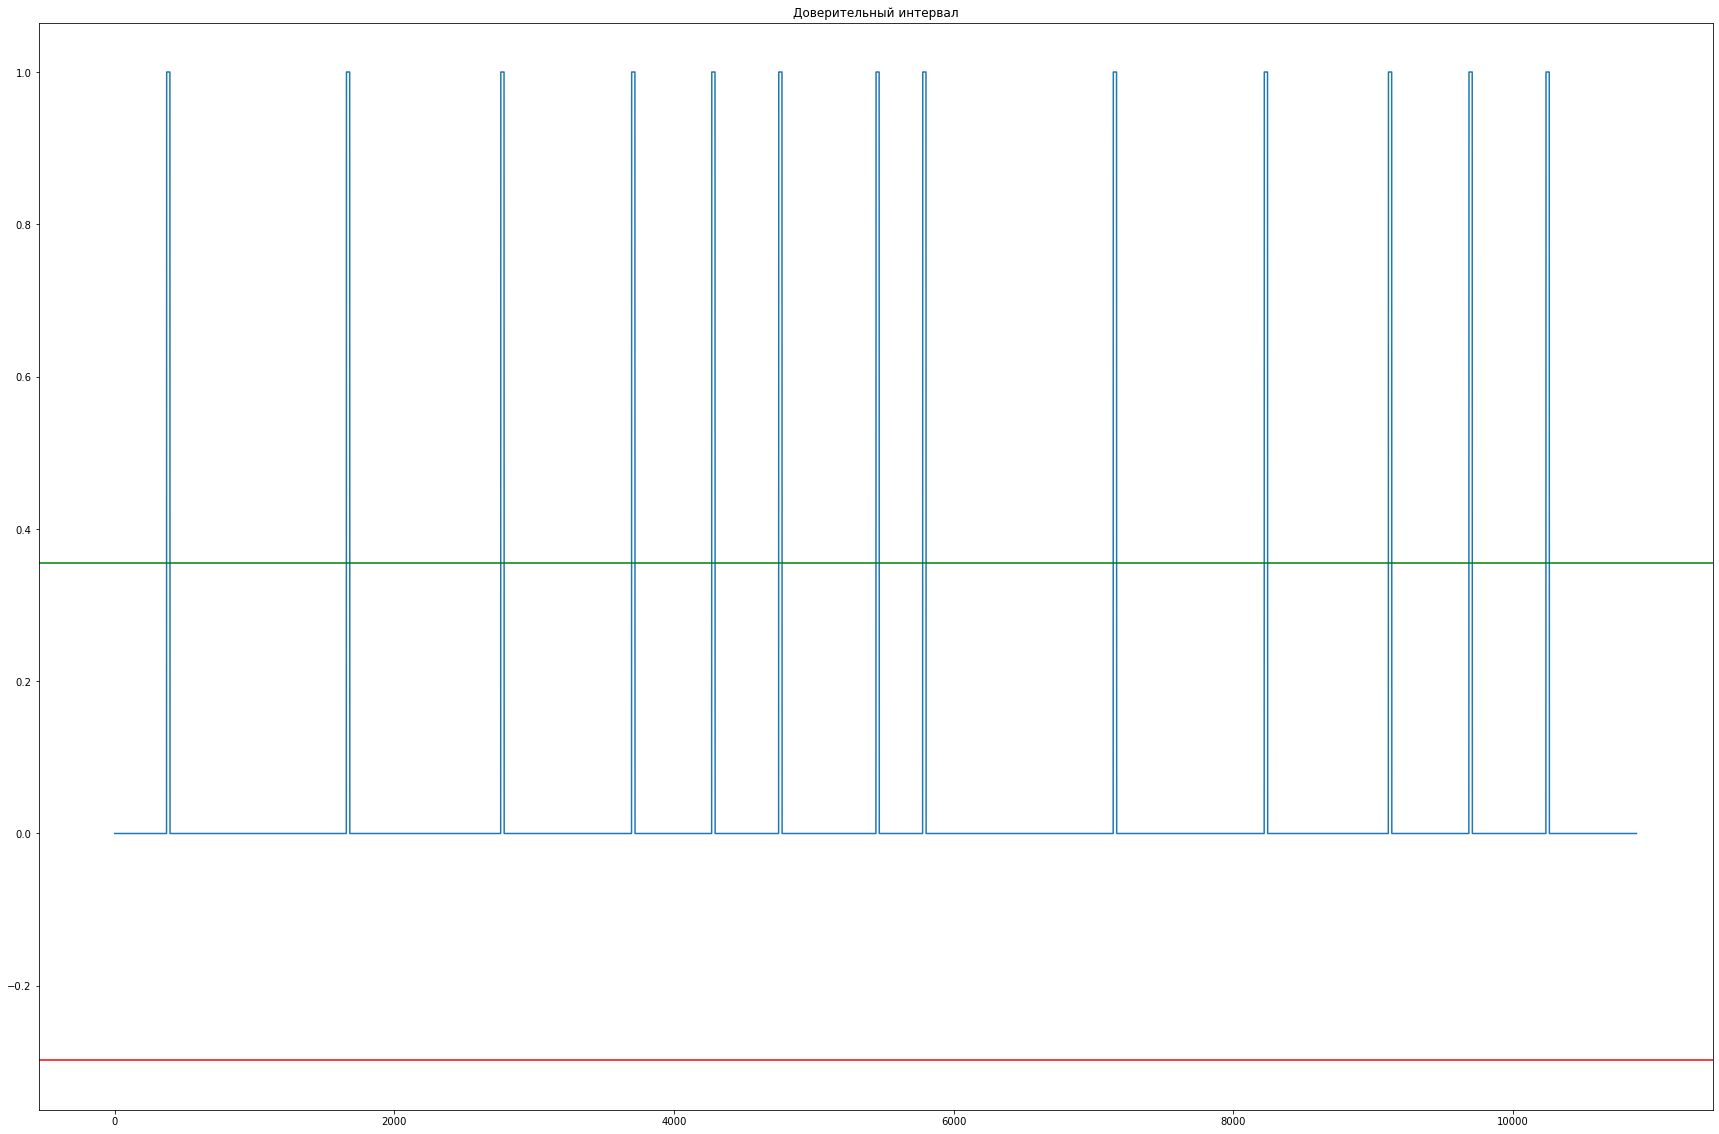

In [130]:
def my_norm_confidence(dataframe, column, alpha = 0.95):
    interval = stats.norm.interval(alpha, loc=dataframe[column].mean(), scale=df[column].std())
    return interval
confidence = my_norm_confidence(df, 'holiday')
df.holiday.plot()
plt.axhline(y=confidence[1], color="g", linestyle="-")
plt.axhline(y=confidence[0], color="r", linestyle="-")
plt.title("Доверительный интервал")


### 5. (*)

Найдите количество значений, выходящих за три сигмы для каждой из метрик. Где получилось больше всего аномалий?

In [188]:
def find_anomaly_count(dataframe):
    upper_level = np.mean(dataframe) + 3*np.std(dataframe)
    lower_level = np.mean(dataframe) - 3*np.std(dataframe)
    column = dataframe.columns
    anomaly = pd.DataFrame(columns = column, index = ['count_anomaly'])
    for i in column:
        anomalies = np.where ((dataframe[i] >= upper_level.loc[i]) | (dataframe[i] <= lower_level.loc[i]),1,0)       
        anomaly[i] = sum(anomalies)

    return anomaly
find_anomaly_count(df)
#Столбец holiday

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count_anomaly,0,311,0,1,0,0,22,67,292,235,147


### 6.

Постройте корреляционную матрицу и heatmap по метрикам. Какие выводы о наличии связей можно сделать?

In [131]:
corr_m = df.corr()
corr_m


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


<AxesSubplot:>

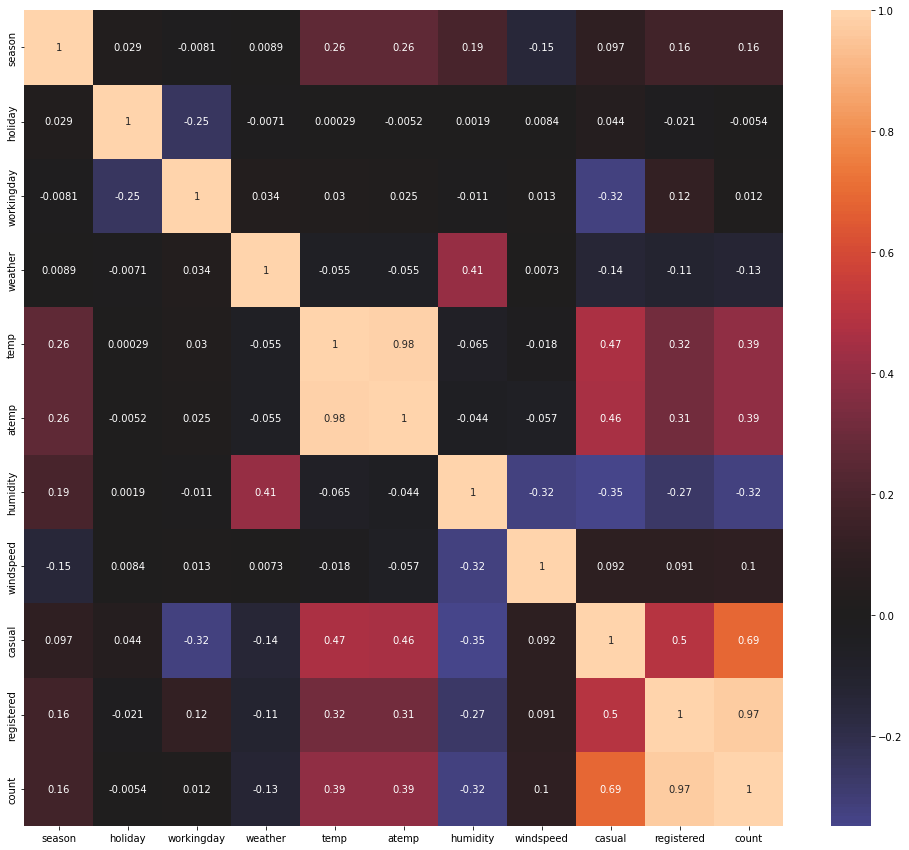

In [132]:
plt.figure(figsize=(17,15))
sns.heatmap(corr_m, center=0, annot=True)

In [ ]:
# #В основном зависимостей нет или слабые, весьма высокие зависимости м/у столбцами count и registred, temp и atemp, 
# умеренные зависимости м/у casual и registred, temp(atemp) и [casual,registred,count], humidity и weather